# H008: Pricing of European options (solutions)

Author: Alberto Suárez González
Student: Antón Salvadores Muñiz

In [1]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
import Anton_Salvadores_Muniz_my_option_pricing as pricing

from scipy.stats import norm, lognorm
from numpy.random import default_rng

from tools_qfb import compare_histogram_pdf


### Black-Scholes model.
In the Black-Scholes model, the price at time $t_0+T$ of an underlying whose present market value is $S(t_0)$ is a lognormal (exponential of a normal random variable) of the form
$$
S(t_0 +T; X) = S(t_0)  
\exp \left\{ \left(\mu-\frac{1}{2}\sigma^2 \right) T + \sigma \sqrt{T} X \right\}; \ \ X \sim \mathcal{N}(0, 1).
$$
where
$$
\begin{eqnarray}
\mu & = & \mathbb{E}\left[ \log{\frac{S(t_0 +T; X)}{S(t_0)}}\right], \\
\sigma & = & \text{std}\left[ \log{\frac{S(t_0 +T; X)}{S(t_0)}}\right],
\end{eqnarray}
$$
are the mean (expected return) and standard deviation (volatility) of the logarithmic returns of the underlying in the interval $[t_0, t_0 + T]$.

##### Exercise 1: Price of the underlying in the Black-Scholes model.

Implement a function to compute $S(t_0 + T; X = x)$, assuming that $x$, the value of the standard normal random variable $X \sim \mathcal{N}(0,1)$, is known. The function should be vectorized in $x$.

**Las funciones utilizadas en todos los ejercicios son las definidas en el archivo Anton_Salvadores_Muniz_my_options_pricing.py, subido en este archivo.**

In [3]:
>>> S_0, mu, sigma, T = 100, 0.05, 0.30, 2.5
>>> X = np.array([-1.0, 0.0, 1.0])
>>> np.round(pricing.S(S_0, mu, sigma, T, X), decimals=4)

# Answer array([ 63.0122, 101.2578, 162.7169])

array([ 63.0122, 101.2578, 162.7169])

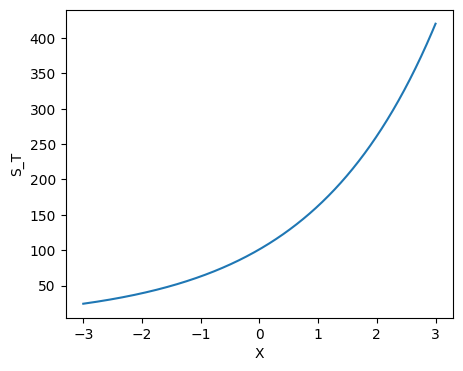

In [4]:
# Example: Dependence of S(t_0 + T; x) on x.
alpha = 3

X = np.linspace(-3, 3, num=1000)
S_T = pricing.S(S_0, mu, sigma, T, X)

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(X, S_T)
_ = ax.set_xlabel("X")
_ = ax.set_ylabel("S_T")

### Pricing of financial derivatives.

The price of a financial derivative involving $D$ underlyings
$\left\{S_d(t); t_0 \le t \le t_0 + T \right\}_{d = 1}^D $ is defined as the expected value of the corresponding discounted payoffs
$$
\text{Price} = \mathbb{E}\left[ \text{Payoff}\left(\left\{S_d(t); t_0 \le t \le t_0 + T \right\}_{d = 1}^D \right) \right],
$$
where the expectation is over the risk-neutral measure.

#### Pricing European options.
A financial derivative in $[t_0, t_0 + T]$ is called European if it involves a single payoff at maturity  $\left(t_0 + T \right)$ that depends only on the value of the underlyings at maturity as well
$$
\text{Price} = e^{-r T} \mathbb{E} \left[ \left\{S_d(\left(t_0 + T \right) \right\}_{d = 1}^D \right].
$$

#### European vanilla options on a single underlying.
* A European call option is defined by the payoff
$$
\text{Payoff}_{\text{call}} = \left(S(\left(t_0 + T \right) - K \right))_+ = \max{S(\left(t_0 + T \right) - K), 0}.
$$
The corresponding price is
$$
C(S_0, K, r, T, \sigma) = e^{-r T} \mathbb{E} \left[ \left(S(\left(t_0 + T \right) - K \right)_+ \right] =
S_0 \Phi(d_{+}) - K e^{-rT} \Phi(d_{-}),
$$
where $\Phi(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x e^{- \frac{x'^2}{2}}$ is the probability distribution function (cdf) of the standard normal, and
$$
d_{\pm} = \frac{1}{ \sigma \sqrt{T}}  
\log \frac{S_0}{K e^{-rT}} \pm \frac{1}{2} \sigma \sqrt{T}.
$$

* A European put option is defined by the payoff
$$
\text{Payoff}_{\text{call}} = \left(K- S(\left(t_0 + T \right) \right)_+ = \max{K - S(\left(t_0 + T \right), 0}.
$$
The corresponding price is
$$
P(S_0, K, r, T, \sigma) = e^{-r T} \mathbb{E} \left[ \left(S(\left(t_0 + T \right) - K \right)_+ \right] = K e^{-rT} (1 - \Phi(d_{-}) - S_0 \phi(d_{+}).
$$

##### Exercise 2: Price of European vanilla options.
Implement a function to calculate the price vanilla European call and put options using the closed-form expression given in the previous cell.

In [5]:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

# Price of the call and the put
>>> [c, p] = pricing.price_european_vanilla_option(S_0, K, r, T, sigma)
print(f"El precio de la call es {c:.4f}"
      f"\nEl precio de la  put es {p:.4f}")

El precio de la call es 29.0051
El precio de la  put es 8.4299


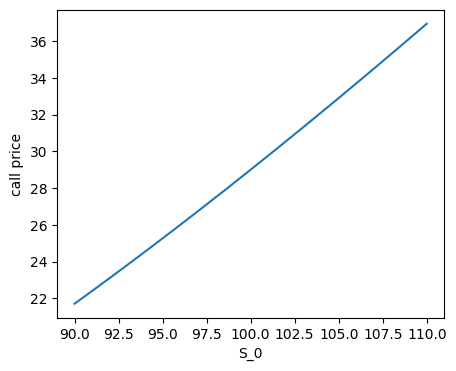

In [6]:
# Dependence of the actual underlying price (S_0) on the call vanilla European price:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

S_0 = np.linspace(90, 110, num=10000)
call = pricing.price_european_vanilla_option(S_0, K, r, T, sigma)[0]

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(S_0, call)
_ = ax.set_xlabel("S_0")
_ = ax.set_ylabel("call price")

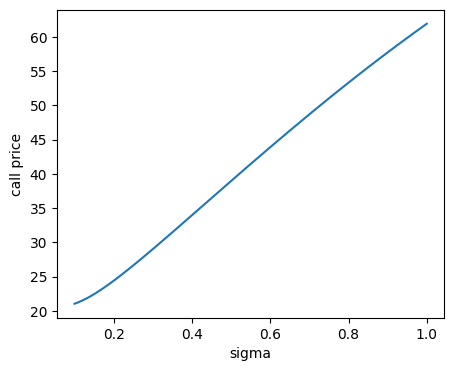

In [7]:
# Dependence of the volatilty (sigma) on the call vanilla European price:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

sigma = np.linspace(0.1, 1, num=10000)
call = pricing.price_european_vanilla_option(S_0, K, r, T, sigma)[0]

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(sigma, call)
_ = ax.set_xlabel("sigma")
_ = ax.set_ylabel("call price")

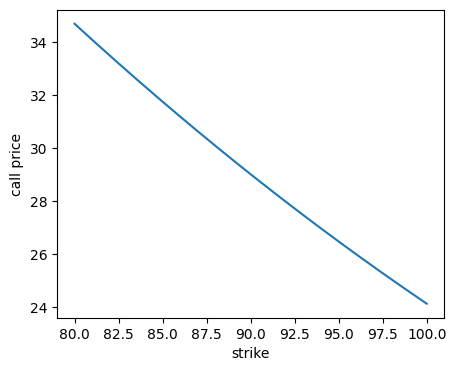

In [8]:
# Dependence of the strike (K) on the call vanilla European price:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

K = np.linspace(80, 100, num=10000)
call = pricing.price_european_vanilla_option(S_0, K, r, T, sigma)[0]

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(K, call)
_ = ax.set_xlabel("strike")
_ = ax.set_ylabel("call price")

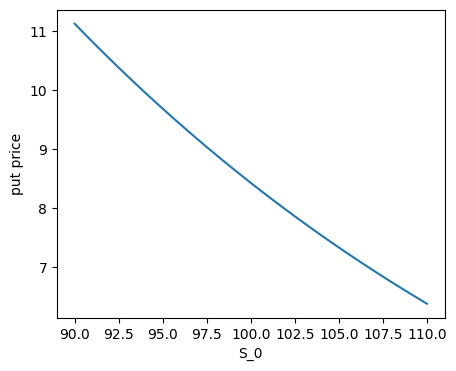

In [9]:
# Dependence of the actual underlying price (S_0) on the put vanilla European price:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

S_0 = np.linspace(90, 110, num=10000)
put = pricing.price_european_vanilla_option(S_0, K, r, T, sigma)[1]

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(S_0, put)
_ = ax.set_xlabel("S_0")
_ = ax.set_ylabel("put price")

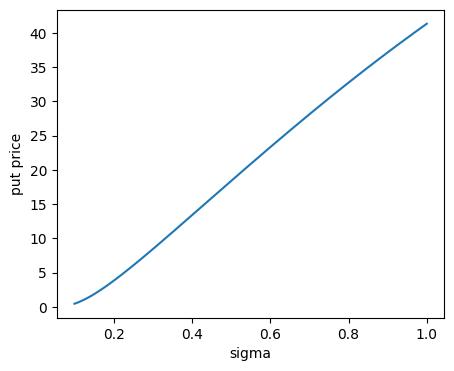

In [10]:
# Dependence of the volatilty (sigma) on the call vanilla European price:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

sigma = np.linspace(0.1, 1, num=10000)
put = pricing.price_european_vanilla_option(S_0, K, r, T, sigma)[1]

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(sigma, put)
_ = ax.set_xlabel("sigma")
_ = ax.set_ylabel("put price")

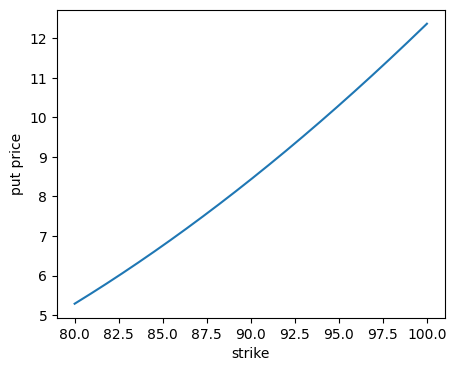

In [11]:
# Dependence of the strike (K) on the call vanilla European price:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

K = np.linspace(80, 100, num=10000)
put = pricing.price_european_vanilla_option(S_0, K, r, T, sigma)[1]

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(K, put)
_ = ax.set_xlabel("strike")
_ = ax.set_ylabel("put price")

Podemos observar que para la call y la put, movimientos en el precio inicial del subyacente y del strike tienen movimientos a la inversa en el precio de la opción, debido a la expectativa alcista (call) o bajista (put) de las opciones. Sin embargo, un aumento de la volatilidad implica un aumento, en mucha mayor medida además que para las otras variables, en el precio de las opciones, tanto de compra como de venta, pues implica tener más posibles escenarios en los que la opción paga y cantidades más suculentas, de ahí que el precio de la opción se disparate.

##### Exercise 3: Price of European options.
Implement a function to calculate the price of a European option over a single underlying using the formula
$$
Price = e^{-r T} \int_{-\infty}^{\infty} dx \frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}} \text{Payoff}\left( S\left(t_0 + T; x\right)\right).
$$

In [12]:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90
>>> resultado_call_put = [pricing.price_european_option(S_0, r, T, sigma, payoff=lambda S_T: np.maximum(S_T-K,0)),
                          pricing.price_european_option(S_0, r, T, sigma, payoff=lambda S_T: np.maximum(K - S_T,0))]
>>> np.round(resultado_call_put, decimals=4)

# Comprobamos que da el mismo resultado que en el anterior ejercicio para
# el Payoff de una Call y una Put ordinarias

array([29.0051,  8.4299])

Es la misma función que la anterior, solo que debemos agregar como un argumento a mayores el propio payoff de la opción, que puede ser más complejo que en las opciones simples. No es necesario añadir como argumento de la opción el strike, pues hay algunas opciones exóticas que no tienen strike, como las opciones lookback, por ejemplo.

##### Exercise 4: Sensitivities of a European call option.
Implement a function to calculate the sensitivities of a vanilla European call option using closed-form expressions.

In [13]:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90
>>> sensitivities = pricing.sensitivities_european_call_option(S_0, K, r, T, sigma)
>>> print(sensitivities)

{'delta': np.float64(0.7651027432732611), 'gamma': np.float64(0.006476915337422296), 'rho': np.float64(118.76285252453776), 'theta': np.float64(-5.289868952330788), 'vega': np.float64(48.576865030667214)}


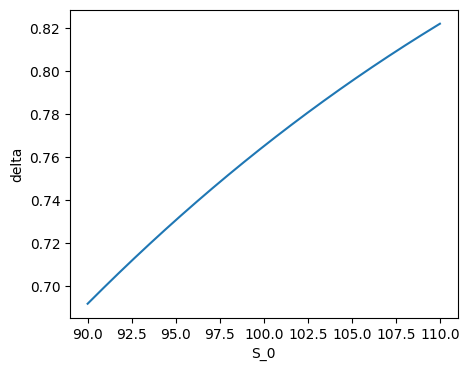

In [14]:
# Dependence of the actual underlying price (S_0) on the call vanilla European delta:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

S_0 = np.linspace(90, 110, num=10000)
delta = []

for s in S_0:
  sensitivities = pricing.sensitivities_european_call_option(s, K, r, T, sigma)
  delta.append(sensitivities['delta'])

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(S_0, delta)
_ = ax.set_xlabel("S_0")
_ = ax.set_ylabel("delta")

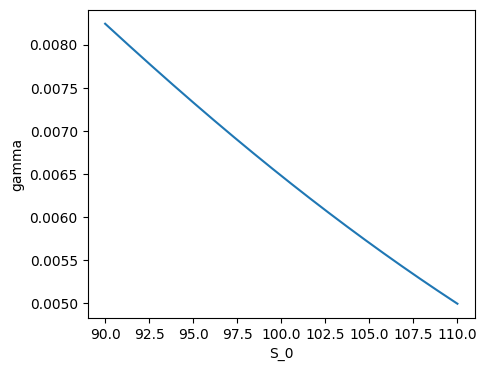

In [15]:
# Dependence of the actual underlying price (S_0) on the call vanilla European gamma:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

S_0 = np.linspace(90, 110, num=10000)
gamma = []

for s in S_0:
  sensitivities = pricing.sensitivities_european_call_option(s, K, r, T, sigma)
  gamma.append(sensitivities['gamma'])

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(S_0, gamma)
_ = ax.set_xlabel("S_0")
_ = ax.set_ylabel("gamma")

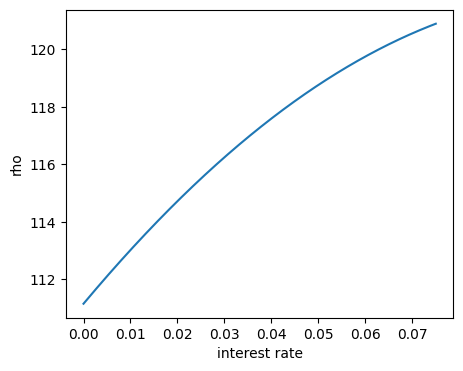

In [16]:
# Dependence of the interest rate (r) on the call vanilla European rho:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

r = np.linspace(0, 0.075, num=10000)
rho = []

for s in r:
  sensitivities = pricing.sensitivities_european_call_option(S_0, K, s, T, sigma)
  rho.append(sensitivities['rho'])

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(r, rho)
_ = ax.set_xlabel("interest rate")
_ = ax.set_ylabel("rho")

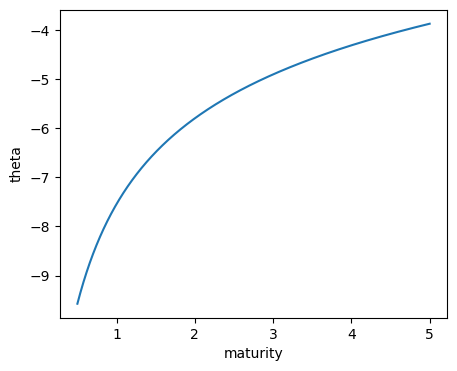

In [17]:
# Dependence of the maturity (T) on the call vanilla European theta:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

T = np.linspace(0.5, 5, num=10000)
theta = []

for s in T:
  sensitivities = pricing.sensitivities_european_call_option(S_0, K, r, s, sigma)
  theta.append(sensitivities['theta'])

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(T, theta)
_ = ax.set_xlabel("maturity")
_ = ax.set_ylabel("theta")

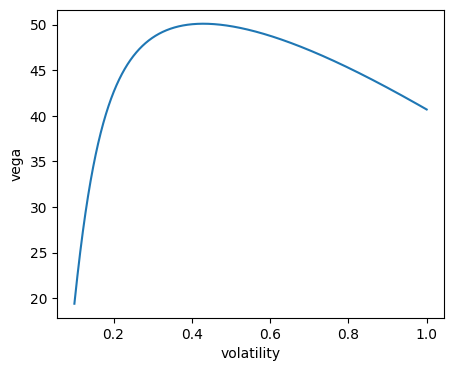

In [18]:
# Dependence of the volatility (sigma) on the call vanilla European vega:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90

sigma = np.linspace(0.1, 1, num=10000)
vega = []

for s in sigma:
  sensitivities = pricing.sensitivities_european_call_option(S_0, K, r, T, s)
  vega.append(sensitivities['vega'])

fig, ax = plt.subplots(figsize =(5, 4))
_ = ax.plot(sigma, vega)
_ = ax.set_xlabel("volatility")
_ = ax.set_ylabel("vega")

Para todas las sensibilidades podemos apreciar que a medida que aumenta la variable de la que dependen, su sensibilidad a esta aumenta también, salvo en el caso de la gamma, evidentemente, pues es la segunda derivada del subyacente; y de la vega, en el que hay un punto en el gráfico donde podemos observar que un aumento de la volatilidad implica en un descenso de la sensibilidad a ella, algo que parece de extrañar en primera instancia. Sin embargo, esto lo podemos explicar gracias a que, cuando la volatilidad es baja (próxima a 0), un aumento en esta implica un aumento importante en el precio de la opción, sin embargo, a medida que esta volatilidad se hace grande, no varía tanto el precio de la opción, lo que explica el último gráfico presentado.

##### Exercise 5: Implicit volativity.
Implement a function to calculate the sensitivities of a vanilla European call option using closed-form expressions.

In [19]:
>>> S_0, r, sigma, T = 100, 0.05, 0.30, 2.5
>>> K = 90
>>> vega_EU_call = lambda sigma: (
                  pricing.sensitivities_european_call_option(S_0, K, r, T, sigma)['vega'])
>>> pricing_function_EU_call = lambda sigma: (
            pricing.price_european_vanilla_option(S_0, K, r, T, sigma)[0])
>>> price = pricing.price_european_vanilla_option(S_0, K, r, T, sigma)[0]

>>> implied_sigma, error = pricing.implied_volatility(price, pricing_function_EU_call, vega_EU_call)
>>> print(f"Volatilidad implícita: {implied_sigma}, Error: {error}")

Volatilidad implícita: 0.3, Error: 0.0


Calculamos la volatilidad implícita de la opción usando el algoritmo de Newton Raphson, teniendo que entregarle como argumentos a la función la sensibilidad de la opción a la volatilidad (vega) como función de sigma, el precio de la opción como función de sigma y el precio real de la opción. La función devuelve la volatilidad implícita y el error cometido al aproximar la volatilidad según el algoritmo empleado.

In [20]:
#!jupyter nbconvert --to html Anton_Salvadores_Muniz_H008_pricing_european_options.ipynb

In [21]:
#from google.colab import files
#files.download('Anton_Salvadores_Muniz_H008_pricing_european_options.html')

### Monte Carlo pricing of a European option.
The price of a European option can be approximated replacing the expected value over the standard normal distribution by a sample average
$$
\begin{eqnarray}
\text{Price} & = & e^{-r T} \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}}
\text{Payoff}\left( S\left(T; x\right)\right) \sim
& \approx & e^{-r T} \frac{1}{M} \sum_{m=1}^{M} \text{Payoff}\left( S\left(T; X_m\right)\right),
\end{eqnarray}
$$
where $\left\{ X_m \right\}_{m=1}^M$ is a $\mathcal{N}(0,1)$ iid (independent, identically distributed) sample of size $M$ .

The Monte Carlo estimate is a random variable, which is the sum of independent random variables. Therefore, by the central limit theorem (CLT), it approaches asymptotically (i.e., for large $M$) a normal distrinution
$$
\text{Price}_{MC} \sim \mathcal{N}\left(\text{Price}_{MC}, \text{stdev}_{MC} \right).
$$
The standard deviation of the Monte Carlo price estimate is
$$
\text{stdev}_{MC} = \frac{1}{\sqrt{M}} \text{stdev}\left[\text{Payoff}\left( S\left(T; X\right)\right)\right].
$$

#### Pseudocode: Monte Carlo pricing of a European option.
1. Generate an iid sample $\left\{ X_m \right\}_{m=1}^M \sim \mathcal{N}\left(0, 1\right).$
2. Compute the  payoffs
$$
\begin{eqnarray}
\text{Payoff}_m & = & \frac{1}{2} \left( \text{Payoff}_m^{(+)} + \text{Payoff}_m^{(-)} \right).
\end{eqnarray}
$$
3. Compute the MC estimates of the price and of the standard deviation of the estimate
$$
\begin{eqnarray}
\text{Price}_{MC} & = & e^{-r T} \frac{1}{M} \sum_{m=1}^{M} \text{Payoff}_m \\
\text{stdev}_{MC} & = & \frac{1}{\sqrt{M}} \text{stdev}\left[\text{Payoff}\left( S\left(T; X\right)\right)\right].
\end{eqnarray}
$$

#### Pseudocode: Monte Carlo pricing of a European option with antithetic variables variance reduction.
1. Generate an iid sample $\left\{ X_m \right\}_{m=1}^M \sim \mathcal{N}\left(0, 1\right).$
2. Compute the  payoffs
$$
\begin{eqnarray}
\text{Payoff}_m^{(+)} & = & \text{Payoff}\left[ S(\left(t_0 + T; X_m \right) \right] \\
\text{Payoff}_m^{(-)} & = & \text{Payoff}\left[ S(\left(t_0 + T; - X_m\right) \right] \\
\text{Payoff}_m & = & \frac{1}{2} \left( \text{Payoff}_m^{(+)} + \text{Payoff}_m^{(-)} \right).
\end{eqnarray}
$$
3. Compute the MC estimates of the price and of the standard deviation of the estimate
$$
\begin{eqnarray}
\text{Price}_{MC} & = & e^{-r T} \frac{1}{M} \sum_{m=1}^{M} \text{Payoff}_m \\
\text{stdev}_{MC} & = & \frac{1}{\sqrt{M}} \text{stdev}\left[\text{Payoff}\left( S\left(T; X\right)\right)\right].
\end{eqnarray}
$$

##### Exercise 6: Monte Carlo pricing of a European option.
Implement a function to estimate the price of a European option using Monte Carlo with the possibility of variance reduction using antithetic variables.

In [22]:
# Example: MC pricing of a European call option
# with and without variance reduction using antithetic variables.

S_0, K, r, T, sigma  = 100.0, 105.0, 0.05, 2.5, 0.30

payoff = lambda S_T: np.maximum(S_T - K, 0.0) # EU call option

n_simulations = int(1e7)

price_MC, stdev_MC = pricing.price_european_option_MC(S_0, r, T, sigma, payoff, n_simulations)
print('Price = {:.4f},   stdev = {:.4f}'.format(price_MC, stdev_MC))

price_MC_antithetic, stdev_MC_antithetic = pricing.price_european_option_MC(
    S_0, r, T, sigma, payoff, n_simulations, antithetic=True)
print('Price = {:.4f},   stdev = {:.4f}'.format(
    price_MC_antithetic, stdev_MC_antithetic))

AttributeError: module 'Anton_Salvadores_Muniz_my_option_pricing' has no attribute 'price_european_option_MC'

In [ ]:
# Example: The MC price estimate is a random variable

price_MC, stdev_MC = pricing.price_european_option_MC(S_0, r, T, sigma, payoff)

# Batch Monte Carlo
B = 1000
# Use list comprehensions to avoid loops
# https://www.w3schools.com/python/python_lists_comprehension.asp

price_batch_MC = [pricing.price_european_option_MC(S_0, r, T, sigma, payoff)[0]
                       for b in range(B)]

price_exact = pricing.price_european_option(S_0, r, T, sigma, payoff)

_ = compare_histogram_pdf(
    price_batch_MC,
    lambda x: norm.pdf(x, loc=price_exact, scale=stdev_MC),
    n_bins=50,
)

### Monte Carlo estimates of the sensitivities.

Sensibilities by Monte Carlo can be estimated using divided diferences.

For instance, the vega of an option is estimated as

$$
vega_{MC}(\sigma)  =
\frac{price_{MC}\left(\sigma \left(1 + h\right)\right)
- price_{MC}\left(\sigma \left(1 - h\right)\right) }{2 h \sigma}.
$$
The value of $h$ is chosen so that a good balance between the rounding ($h$ too small) and truncation ($h$ too large) errors is attained. For instance, $h = 10^{-6}$.

If the two prices that are used in the previous expression are estimated in two indepentent simulations, the error of the expression in the numerator is the *sum* of the fluctuation errors in each of the price estimates.
Since the numerator itself is small, the subtraction amplifies the error substantially.

In [ ]:
# Error propagation in the MC estimation of a sensitivity

S_0, K, r, T, sigma = 100.0, 105.0, 0.05, 2.5, 0.30

payoff = lambda S_T: np.maximum(S_T - K, 0)

n_simulations = int(1e7)

h = 1.0e-6 # balance between rounding and truncation errors.
delta_sigma = sigma * h
sigma_plus = sigma + delta_sigma
sigma_minus = sigma - delta_sigma

price_MC_plus, stdev_price_MC_plus = pricing.price_european_option_MC(
    S_0, r, T, sigma_plus, payoff, n_simulations
)

price_MC_minus, stdev_price_MC_minus = pricing.price_european_option_MC(
    S_0, r, T, sigma_minus, payoff, n_simulations
)

vega_MC = (price_MC_plus - price_MC_minus) / (2.0 * delta_sigma)

# Since the simulations are independent, errors add up
error_vega_MC = (stdev_price_MC_plus + stdev_price_MC_minus) / (2.0 * delta_sigma)

sensitivities = pricing.sensitivities_european_option(S_0, r, T, sigma, payoff)


print('vega (exact) = {:.3f}'.format(sensitivities['vega']))
print('vega (MC) = {:.3f} ({:.3f})'.format(vega_MC, error_vega_MC))

#### Common random numbers.

If the same sample, $\left\{X_m \right\}_{m=1}^M \sim \mathcal{N}\left(0, 1\right)$, is used for both price estimates
$$
vega_{CRN}(\sigma)  =
\frac{price_{MC}\left(\sigma \left(1 + h\right); \left\{X_m \right\}_{m=1}^M \right)
- price_{MC}\left(\sigma \left(1 - h\right)\right); \left\{X_m \right\}_{m=1}^M }{2 h \sigma},
$$
the fluctuation errors approximately cancel. As a result, the MC estimate based on common random numbers (CRN) becomes more accurate.

In [ ]:
# Common random numbers usign a seed for the random number generator.

seed = 0
vega_MC_CRN = (
    pricing.price_european_option_MC(
        S_0, r, T, sigma_plus, payoff, n_simulations, seed=seed
    )[0]
    - pricing.price_european_option_MC(
        S_0, r, T, sigma_minus, payoff, n_simulations, seed=seed
    )[0]
) / (2.0 * delta_sigma)

print('vega (exact) = {:.3f}'.format(sensitivities['vega']))
print('vega (MC) = {:.3f} ({:.3f})'.format(vega_MC, error_vega_MC))
print('vega (MC + CRN) = {:.3f}'.format(vega_MC_CRN))
print('But, the random sample is generated twice!')

In [ ]:
# Common random numbers: sample generated only once.

rng = default_rng(seed)
X = rng.standard_normal(n_simulations)

vega_MC_CRN = (
    pricing.price_european_option_MC(S_0, r, T, sigma_plus, payoff, X=X)[0]
    - pricing.price_european_option_MC(S_0, r, T, sigma_minus, payoff, X=X)[0]
) / (2.0 * delta_sigma)

print('vega (exact) = {:.3f}'.format(sensitivities['vega']))
print('vega (MC + CRN) = {:.3f}'.format(vega_MC_CRN))
print('But, how does one estimate the MC error?')

#### Monte Carlo + common random numbers for sensitivities: Error estimation.


In [ ]:
rng = default_rng(seed)
X = rng.standard_normal(n_simulations)

S_T_plus = pricing.S(S_0, r, sigma_plus, T, X)
S_T_minus = pricing.S(S_0, r, sigma_minus, T, X)

payoff_MC_plus = payoff(S_T_plus)
payoff_MC_minus = payoff(S_T_minus)

vega_trajectory_MC = (
    (payoff_MC_plus - payoff_MC_minus) / (2.0 * delta_sigma)
)

discount_factor = np.exp(-r*T)
vega_MC_CRN = discount_factor * np.mean(vega_trajectory_MC)
stdev_vega_MC_CRN = (
    discount_factor *
    np.std(vega_trajectory_MC) / np.sqrt(n_simulations)
)

print('vega (exact) = {:.3f}'.format(sensitivities['vega']))
print('vega (MC + CRN) = {:.3f} ({:.3f})'.format(
    vega_MC_CRN, stdev_vega_MC_CRN))

### European call involving two assets.

The pricing formula for a EU call of an option that involves two assets is
$$
\text{Price} = e^{ -r T} \int_{-\infty}^{\infty} dx_1  \frac{1}{\sqrt{2 \pi}} e^{- \frac{x_1^2}{2}} \int_{-\infty}^{\infty} dx_2 \frac{1}{\sqrt{2 \pi}} e^{- \frac{x_2^2}{2}} \text{Payoff}\left( S_1\left(T; x_1\right), S_2\left(T; \rho x_1 + \sqrt{1 - \rho^2} x_ 2 \right)\right).
$$